In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('train.csv')
train.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15830 entries, 0 to 15829
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15830 non-null  int64  
 1   value       15830 non-null  int64  
 2   is_anomaly  15830 non-null  bool   
 3   predicted   15830 non-null  float64
dtypes: bool(1), float64(1), int64(2)
memory usage: 386.6 KB


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,15830.0,1.427383e+09,1.370962e+06,1.425009e+09,1.426196e+09,1.427383e+09,1.428570e+09,1.429757e+09
value,15830.0,8.557220e+01,3.217609e+02,0.000000e+00,2.900000e+01,4.700000e+01,7.600000e+01,1.347900e+04
predicted,15830.0,7.187072e+01,9.245052e+01,-2.813891e+02,3.291917e+01,4.977112e+01,7.594805e+01,2.716127e+03


In [5]:
train.replace(('False','True'),(0, 1), inplace=True)

<AxesSubplot:xlabel='is_anomaly', ylabel='count'>

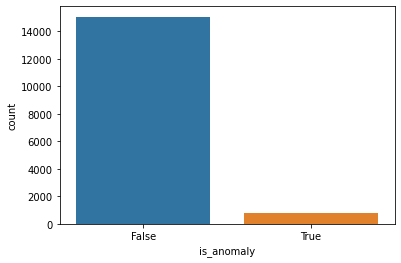

In [6]:
sns.countplot(x='is_anomaly',data=train)

<AxesSubplot:xlabel='predicted', ylabel='Count'>

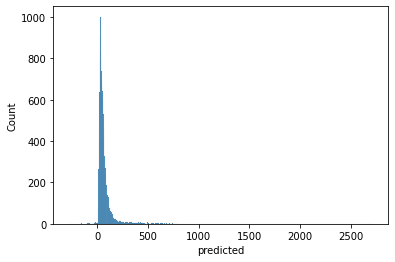

In [7]:
sns.histplot(x='predicted',data=train)

<AxesSubplot:xlabel='value', ylabel='Count'>

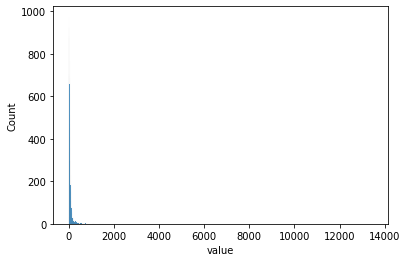

In [8]:
sns.histplot(x='value',data=train)

In [9]:
x= train.drop(['is_anomaly','timestamp'], axis=1)
y= train['is_anomaly']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [11]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [12]:
knn.score(x_test,y_test)

0.9722434915773354

In [13]:
test = pd.read_csv('test.csv')
test.head()

,timestamp,value,predicted
0,1396332000,20.0,20.0
1,1396332300,20.0,20.0
2,1396332600,20.0,20.0
3,1396332900,20.0,20.0
4,1396333200,20.0,20.0


In [14]:
test_data=test.drop(['timestamp'],axis=1)

In [15]:
predicted_data=knn.predict(test_data)

In [16]:
output = pd.DataFrame({'timestamp': test['timestamp'], 'is_anomaly': predicted_data})
output

,timestamp,is_anomaly
0,1396332000,False
1,1396332300,False
2,1396332600,False
3,1396332900,False
4,1396333200,False
...,...,...
3955,1397518500,False
3956,1397518800,False
3957,1397519100,False
3958,1397519400,False


In [17]:
output.to_csv('submission.csv')